In [ ]:
import numpy as np
class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
      b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of
          examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [ ]:
class AdalineGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
      Mean squared error loss function values in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples
            is the number of examples and
            n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X))
                        >= 0.5, 1, 0)

In [ ]:
#1) Comparison Perceptron and Adaline

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Iris DataSet
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data = pd.read_csv(url, header = None, encoding='utf-8')

#Choosing first two classes(setosa, versicolor) with all features (x->features, y->class)
X = iris_data.iloc[:100, :4]
y = iris_data.iloc[:100, 4]

#Converting class to binary (0->setosa and 1->versicolor)
y = np.where(y == 'Iris-setosa', 0, 1)

#Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the datainto training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, shuffle=True)

#Train Perceptron
perceptron = Perceptron(eta=0.01, n_iter=50, random_state=1)
perceptron.fit(X_train, y_train)

# Make predictions with Perceptron
y_pred = perceptron.predict(X_test)

print('Accuracy (Perceptron): %.3f' % accuracy_score(y_test, y_pred))

#Train Adaline
adaline = AdalineGD(eta=0.01, n_iter=50, random_state=1)
adaline.fit(X_train, y_train)

# Make predictions with Adaline
y_pred_adaline = adaline.predict(X_test)

print('Accuracy (Adaline): %.3f' % accuracy_score(y_test, y_pred_adaline))

# Compare Error results
print("Perceptron Errors per Epoch:", perceptron.errors_)
print("Adaline Losses per Epoch:", adaline.losses_)

# Calculate total updates
total_updates_perceptron = sum(perceptron.errors_)
total_updates_adaline = adaline.n_iter * X_train.shape[0]

print("Total updates for Perceptron:", total_updates_perceptron)
print("Total updates for Adaline:", total_updates_adaline)

Accuracy (Perceptron): 1.000
Accuracy (Adaline): 1.000
Perceptron Errors per Epoch: [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Adaline Losses per Epoch: [0.5274149327149067, 0.48748383888318747, 0.4513665290483686, 0.4186563995734177, 0.38899221913788534, 0.3620529787653871, 0.33755332997077303, 0.3152395437201012, 0.29488593060522167, 0.2762916694603434, 0.2592779976916042, 0.24368572194195331, 0.22937301245193165, 0.21621344867241377, 0.20409428740025382, 0.19291492799711682, 0.18258555216432562, 0.17302591832548106, 0.1641642929521468, 0.15593650318985977, 0.1482850969321131, 0.14115859807527795, 0.1345108460911877, 0.12830041029709427, 0.12249007030334462, 0.11704635509372091, 0.11193913405637924, 0.10714125404749561, 0.10262821724639977, 0.09837789516017792, 0.0943702746663204, 0.09058723245184472, 0.08701233462339261, 0.08363065863124274, 0.08042863497645403, 0.077393906459

In [ ]:
#2
#Modify the class Perceptron given in the textbook such that the bias data field b is absorbed by
#the weight vector w . Your program is required to be compatible with the training program in the textbook.

import numpy as np
class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
      b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of
          examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=X.shape[1]+1)
        self.errors_ = []

        # #Adding a column of ones to X for bias
        X_bias = np.c_[X, np.ones(X.shape[0])]

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X_bias, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Iris DataSet
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data = pd.read_csv(url, header = None, encoding='utf-8')

#Choosing first two classes(setosa, versicolor) with all features (x->features, y->class)
X = iris_data.iloc[:100, :4]
y = iris_data.iloc[:100, 4]

#Converting class to binary (0->setosa and 1->versicolor)
y = np.where(y == 'Iris-setosa', 0, 1)

#Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the datainto training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, shuffle=True)

# Add a column of ones to X_test for bias
X_test = np.c_[X_test, np.ones(X_test.shape[0])]

#Train Perceptron
perceptron = Perceptron(eta=0.01, n_iter=50, random_state=1)
perceptron.fit(X_train, y_train)

#Evaluate accuracy for perceptron
y_pred = perceptron.predict(X_test)
print('Accuracy (Perceptron): %.3f' % accuracy_score(y_test, y_pred))

Accuracy (Perceptron): 1.000


In [ ]:
#3
#A perceptron can only be used for binary classification, however, the Iris dataset has 3 classes:
#setosa, versicolor and virginica. If you are only allowed to use perceptrons but the number is not limited,
#how would you like to perform a multiclass classification for the Iris data set (all features)? Please write a
#program (demo) for this task using the new perceptron class developed in the previous task

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Iris DataSet
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data = pd.read_csv(url, header = None, encoding='utf-8')

# Extract features (X) and labels (y)
X = iris_data.iloc[:, :4].values
y = iris_data.iloc[:, 4].values

# Convert class labels to integers: 0 (setosa), 1 (versicolor), 2 (virginica)
y = np.where(y == 'Iris-setosa', 0, np.where(y == 'Iris-versicolor', 1, 2))

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, shuffle=True)

# Train three Perceptrons (One-vs-All)
perceptrons = []
for class_label in [0, 1, 2]:
    # Create binary labels for the current class
    y_binary_label = np.where(y_train == class_label, 1, 0)

    # Train a Perceptron
    perceptron = Perceptron(eta=0.01, n_iter=50, random_state=1)
    perceptron.fit(X_train, y_binary_label)
    perceptrons.append(perceptron)

# Print details of each Perceptron
for i, perceptron in enumerate(perceptrons):
    print(f"Perceptron {i} (Class {i} vs All):")
    print(f"  Weights: {perceptron.w_}")
    print(f"  Errors during training: {perceptron.errors_}")
    print()

# Predict using all three Perceptrons
X_test_bias = np.c_[X_test, np.ones(X_test.shape[0])]  # Add bias column to X_test
confidences = np.array([perceptron.net_input(X_test_bias) for perceptron in perceptrons])

# Assign class with the highest confidence
y_pred = np.argmax(confidences, axis=0)

# # Calculate accuracy
print('Accuracy (Multiclass Perceptron): %.3f' % accuracy_score(y_test, y_pred))

Perceptron 0 (Class 0 vs All):
  Weights: [ 0.00881182  0.00563771 -0.02622346 -0.02522677 -0.01134592]
  Errors during training: [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Perceptron 1 (Class 1 vs All):
  Weights: [-0.00451664 -0.00824647  0.04030941 -0.05020664 -0.01134592]
  Errors during training: [48, 45, 43, 34, 40, 41, 41, 43, 43, 39, 45, 42, 44, 44, 41, 37, 44, 42, 47, 42, 37, 39, 38, 44, 38, 43, 42, 43, 40, 38, 43, 44, 39, 44, 36, 39, 41, 44, 38, 44, 41, 35, 40, 37, 43, 44, 39, 43, 40, 37]

Perceptron 2 (Class 2 vs All):
  Weights: [-0.02107625 -0.0258331   0.10449184  0.06662901 -0.11134592]
  Errors during training: [19, 15, 5, 4, 9, 6, 4, 4, 5, 9, 6, 6, 6, 6, 6, 5, 4, 6, 2, 4, 2, 4, 2, 6, 4, 5, 2, 4, 2, 2, 4, 4, 4, 5, 6, 6, 6, 6, 6, 2, 4, 2, 4, 2, 2, 6, 5, 6, 6, 4]

Accuracy (Multiclass Perceptron): 0.956


In [ ]:
#4
#In the textbook, both SGD and mini-batch GD are explained. Let us write a new training function
#fit mini batch SGD in the class AdalineSGD such that the new function combines SGD and mini-batch
#GD in training. In every epoch, the mini-batch SGD method updates the learning parameters based on a
#randomly selected subset of the training data. The size (number of samples) of the subset is called the batch
#size which is a hyperparameter decided by the user.

import numpy as np

class AdalineSGD:
    """
    ADAptive LInear NEuron classifier with Mini-Batch Stochastic Gradient Descent.

    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0).
    n_iter : int
        Number of training epochs (Passes over the training dataset).
    batch_size : int
        Number of training samples in each mini-batch.
    shuffle : bool (default: True)
        Shuffles training data every epoch to prevent cycles.
    random_state : int
        Random number generator seed for random weight initialization.

    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting.
    b_ : float
        Bias unit after fitting.
    losses_ : list
        Mean squared error (MSE) loss function in each epoch.
    """

    def __init__(self, eta=0.01, n_iter=50, batch_size=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.w_initialized = False  # Track whether weights are initialized

    def fit_mini_batch_SGD(self, X, y):
        """
        Fit training data using Mini-Batch SGD.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object
        """
        self._initialize_weights(X.shape[1])  # Initialize weights randomly
        self.losses_ = []  # Store mean squared error loss per epoch

        for _ in range(self.n_iter):  # iterates through multiple epochs
            if self.shuffle:
                X, y = self._shuffle(X, y)  #shuffles full dataset before forming mini-batches

            # Processing data in mini-batches
            losses = []
            for start_idx in range(0, X.shape[0], self.batch_size):
                end_idx = min(start_idx + self.batch_size, X.shape[0])
                X_batch, y_batch = X[start_idx:end_idx], y[start_idx:end_idx]  #Extracts mini-batch
                losses.append(self._update_weights(X_batch, y_batch))

            # Store the average loss for this epoch
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)

        return self

    def _shuffle(self, X, y):
        """Shuffles training data to avoid cycles in learning."""
        r = self.rgen.permutation(len(y))  # Generate a random permutation
        return X[r], y[r]  # Shuffle features & labels

    def _initialize_weights(self, m):
        """Initializes weights to small random numbers."""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.0)
        self.w_initialized = True  # Mark weights as initialized

    def _update_weights(self, X_batch, y_batch):
        """
        Applying Adaline weight updates using Mini-Batch Gradient Descent.

        - Unlike standard SGD (updates per sample), this updates weights using a batch of samples.
        - Uses gradient descent formula for weight updates.
        """
        net_input = self.net_input(X_batch)
        output = self.activation(net_input)
        errors = y_batch - output

        # Updating weights using mini-batch gradient descent (vectorized operation)
        self.w_ += self.eta * 2.0 * X_batch.T.dot(errors) / X_batch.shape[0]  #weight update
        self.b_ += self.eta * 2.0 * errors.mean()  #bias update

        # Computing Mean Squared Error for the batch
        loss = np.mean(errors**2)
        return loss

    def net_input(self, X):
        """Calculates net input (dot product of inputs & weights plus bias)."""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Computes linear activation (identity function)."""
        return X

    def predict(self, X):
        """Returns class labels after applying threshold at 0.5."""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

testing [0.40301172676382724, 0.25726886745025096, 0.17266106541812562, 0.12208992105649392, 0.09086987962393757, 0.07110555031794855, 0.057938482407433656, 0.0491601359758403, 0.042915736360389554, 0.038293889750267734, 0.03499748026388813, 0.032368490317658594, 0.030262895323015033, 0.02846350318905102, 0.02703937804171439]


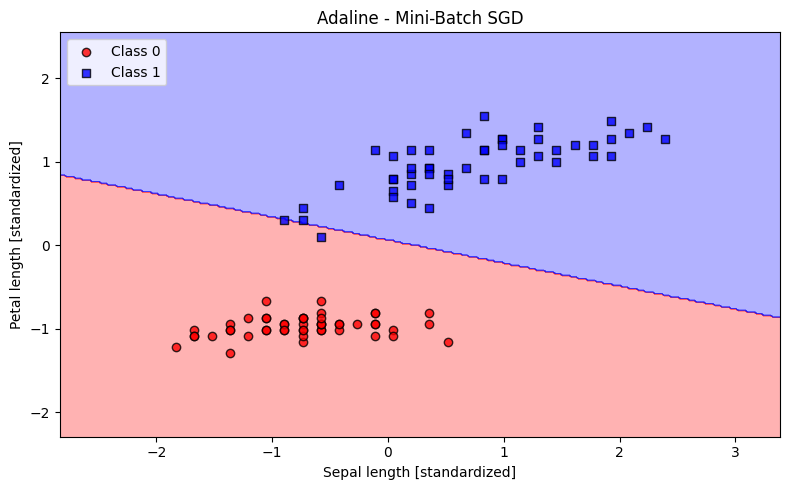

Plotting Loss Curve...


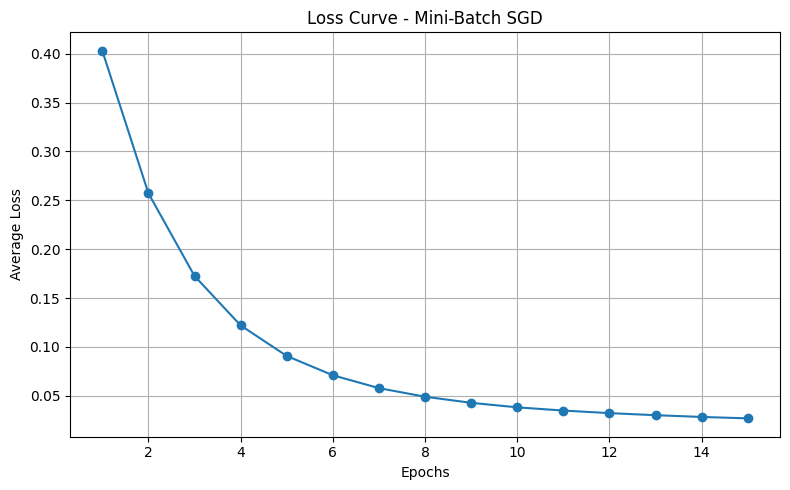

Loss Curve Plotted.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Function to plot decision boundary
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('o', 's')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0],
                    y=X[y == c1, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {c1}',
                    edgecolor='black')

# Load Iris dataset and preprocess
iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Convert to binary classification (Class 0 and 1)
X, y = X[y != 2], y[y != 2]

# Standardize features
sc = StandardScaler()
X_std = sc.fit_transform(X)

# Train Adaline using Mini-Batch SGD
ada_mini_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_mini_sgd.fit_mini_batch_SGD(X_std, y)
print('testing', ada_mini_sgd.losses_)

# Plot Decision Boundary
plt.figure(figsize=(8, 5))
plot_decision_regions(X_std, y, classifier=ada_mini_sgd)
plt.title('Adaline - Mini-Batch SGD')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Plot Loss Curve
print("Plotting Loss Curve...") # Debugging
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(ada_mini_sgd.losses_) + 1), ada_mini_sgd.losses_, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.title('Loss Curve - Mini-Batch SGD')
plt.grid(True)
plt.tight_layout()
plt.show()
print("Loss Curve Plotted.") # Debugging